# Questions per context
This script computes statistics for how many questions are asked for each context. The instruction to the annotators were just to ask questions on the given contexts, thus, each context could have any number of questions related to it.

In [4]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [5]:
df_train = pd.read_pickle("./data_frames/df_train.pkl")


In [10]:
def plot_question_distribution(data):
    plt.hist(data.values(), density=True, bins=10, color='g')
    plt.ylabel('%')
    plt.xlabel('Number of questions for context')
    plt.title('Number of question per context')
    plt.show()

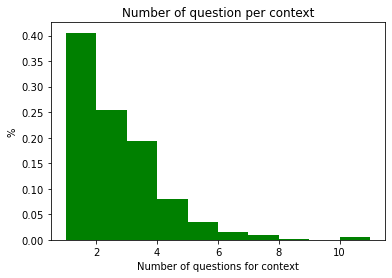

In [11]:
def count_questions_per_answers(df):
    context_dict = {}
    for index, row in df.iterrows():
        context = row['context']
        if context in context_dict:
            context_dict[context] += 1
        else:
            context_dict[context] = 1
    return context_dict

c_dict = count_questions_per_answers(df_train)
plot_question_distribution(c_dict)